介绍了Numpy中的广播机制和迭代机制

In [1]:
import numpy as np

### 1. 广播

广播是指 NumPy 在算术运算期间处理不同形状的数组的能力。其中较小的数组会广 播到较大数组的大小，以便使它们的形状可兼容。

广播的规则：
（1）ndim 较小的数组会在前面追加一个长度为 1 的维度
（2）输出数组的每个维度的大小是输入数组该维度大小的最大值。
（3）如果输入在每个维度中的大小与输出大小匹配，或其值正好为1，则在计算中可它。其中，若某个维度大小为 1，则该维度中的第一个数据元素将用于该维度的 所有计算。

广播的顺序：从尾随的维度开始，并朝着前进的方向前进

In [2]:
# 对于shape一样的ndarray，部分计算是逐元素计算的
a = np.array([1,2,3,4])
b = np.array([10, 20, 30, 40])
print(a*b)

[ 10  40  90 160]


In [3]:
# 对于shape不一样的ndarray，若条件满足，触发广播机制
a = np.array([[1,2,3,4], [-1,-2,-3,-4]])
b = np.array([10, 20, 30, 40])
print(a*b)

[[  10   40   90  160]
 [ -10  -40  -90 -160]]


### 2. 迭代

numpy提供了一个迭代器对象 numpy.nditer，用于对数组元素进行迭代

In [5]:
c = np.arange(12).reshape(3,4)

In [12]:
# 迭代打印c中的元素
for item in np.nditer(c):
    print(item, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,

In [13]:
# 默认状态下，转置顺序匹配数组的内容布局，而不考虑特定的顺序
d = c.T
for item in np.nditer(d):
    print(item, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,

In [15]:
# 若用不同的风格来存储ndarray，其迭代顺序不一样
d2 = d.copy(order='C')   # C语言的风格,会按照转置后的顺序打印
d3 = d.copy(order='F')   # Fortran的风格，不会按照转置后的顺序打印
for item in np.nditer(d2):
    print(item, end=',')
print("\n","-"*20)
for item in np.nditer(d3):
    print(item, end=',')

0,4,8,1,5,9,2,6,10,3,7,11,
 --------------------
0,1,2,3,4,5,6,7,8,9,10,11,

nditer 对象有另一个可选参数 op_flags 。 其默认值为只读，但可以设置为读 写或只写模式。 这将允许使用此迭代器修改数组元素。

In [17]:
for x in np.nditer(c, op_flags=['readwrite']):
    x *= 2
print(c)

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


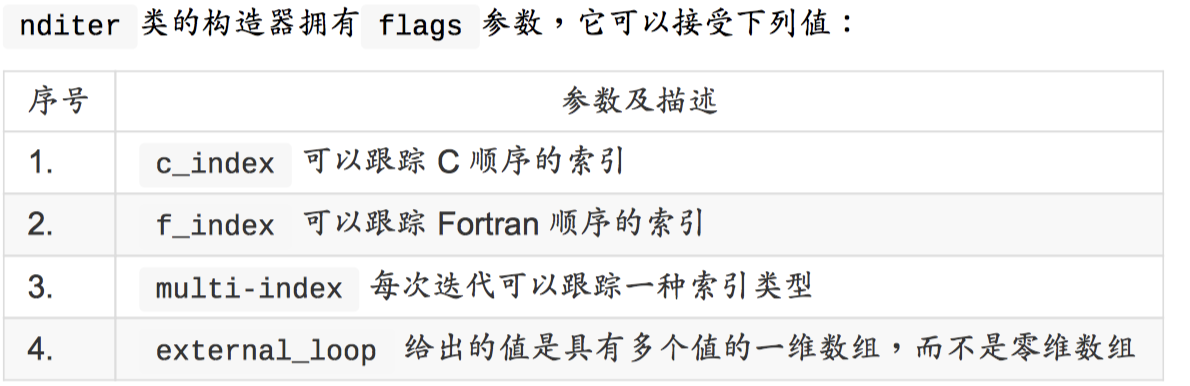

In [18]:
for x in np.nditer(c, flags =['external_loop'], order ='F'):
    print(x)

[ 0  8 16]
[ 2 10 18]
[ 4 12 20]
[ 6 14 22]


### 3. 广播迭代

如果两个数组是可广播的， nditer 组合对象能够同时迭代它们。

In [22]:
a = np.arange(12).reshape(3,4)
b = np.array([10, 20, 30, 40])
for i, j in np.nditer([a,b]):
    print("{}:{}".format(i, j))

0:10
1:20
2:30
3:40
4:10
5:20
6:30
7:40
8:10
9:20
10:30
11:40
